# Finding good `tx_gain` and `rx_gain` settings for PlutoSDR

The adjustment of transmission (`tx_gain`) and reception (`rx_gain`) gains can be tricky as optimal settings are influenced by path loss, noise, and interference levels. The SDR_Pluto.py class offers analytical tools to evaluate the signal-to-interference-plus-noise ratio (SINR) against `tx_gain` for a fixed `rx_gain`. Empirical data suggest that modulating `tx_gain` provides a more linear and predictable improvement in SINR compared to `rx_gain` adjustments. This functionality allows for the empirical determination of optimal `tx_gain` settings.

Note that different bandwidth settings will result in different power densities and hence impact the SINR, and hence the results from the below graph are only indicative.

In [1]:
import SDR_Pluto 

SDR_1 = SDR_Pluto.SDR(SDR_TX_IP="ip:192.168.1.10", 
                      SDR_TX_FREQ=int(917e6), 
                      SDR_TX_GAIN=int(-80), 
                      SDR_RX_GAIN = int(0), 
                      SDR_TX_SAMPLERATE=int(4e6), 
                      SDR_TX_BANDWIDTH=int(8e6))

SDR_1.SDR_TX_start()
SDR_1.SDR_TX_stop()

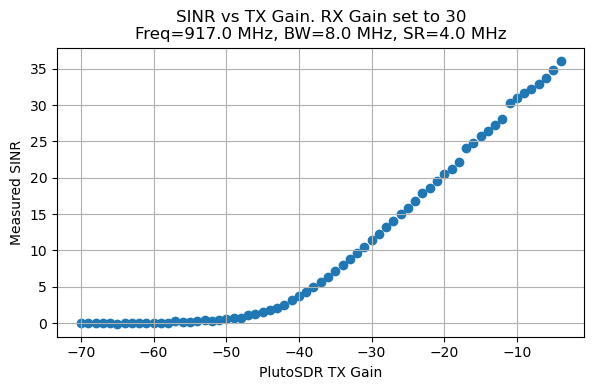

<Figure size 640x480 with 0 Axes>

In [2]:
max_desired_SINR = 35
tx_gain = SDR_1.find_good_max_TX_gain_value(SDR_RX_GAIN=30, Max_SINR=max_desired_SINR)

In [3]:
print(f'For target SINR = {max_desired_SINR} dB, in these settings, the TX gain could initially be set to approximately {tx_gain} dB')
SDR_1.show_params()

For target SINR = 35 dB, in these settings, the TX gain could initially be set to approximately -4 dB
RX LO: 916999998
TX LO: 916999998
RX RF Bandwidth: 8000000
TX RF Bandwidth: 8000000
Sample Rate: 4000000
RX Buffer Size: 10000
Gain Control Mode: manual
RX Gain: 30
TX Gain: -80
Filter: [128.0, 4.0, 128.0, 4.0]
TX Cyclic Buffer: True
